# Predicting Online Customer's Intention to shop

## GROUP-A

#### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from scipy import optimize

#### Reading the dataset

#### Link to dataset : https://archive.ics.uci.edu/ml/machine-learning-databases/00468/

In [3]:
df=pd.read_csv(r"C:\Users\14372\Desktop\online_shoppers_intention.csv")

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### Checking for null values

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Cleaning the dataset by removing outliers. Data points with Administrative values less than 10 and Administrative duration less than 150 seconds are filtered out.

In [7]:
def get_cleaned(df):
    return df[(df.Administrative <10) & (df.Administrative_Duration<150) & (df.ProductRelated<120)]


In [8]:
df=get_cleaned(df)

## Exploratory Data Analysis

C:\Users\14372\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\14372\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


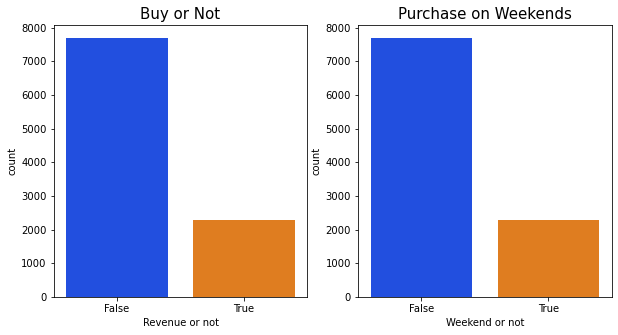

In [9]:
# checking the Distribution of customers on Revenue

#plt.rcParams['figure.figsize'] = (18, 7)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.countplot(df['Weekend'], palette = 'bright')
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 10)
plt.ylabel('count', fontsize = 10)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(df['Weekend'], palette = 'bright')
plt.title('Purchase on Weekends', fontsize = 15)
plt.xlabel('Weekend or not', fontsize = 10)
plt.ylabel('count', fontsize = 10)

plt.show()

#### It can be seen that majority of users visiting product pages are not buyers. Also It can be inferred from the barplot that most of the sales happen during weekdays.

### Countplot showing count of transactions made by customers each month

C:\Users\14372\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

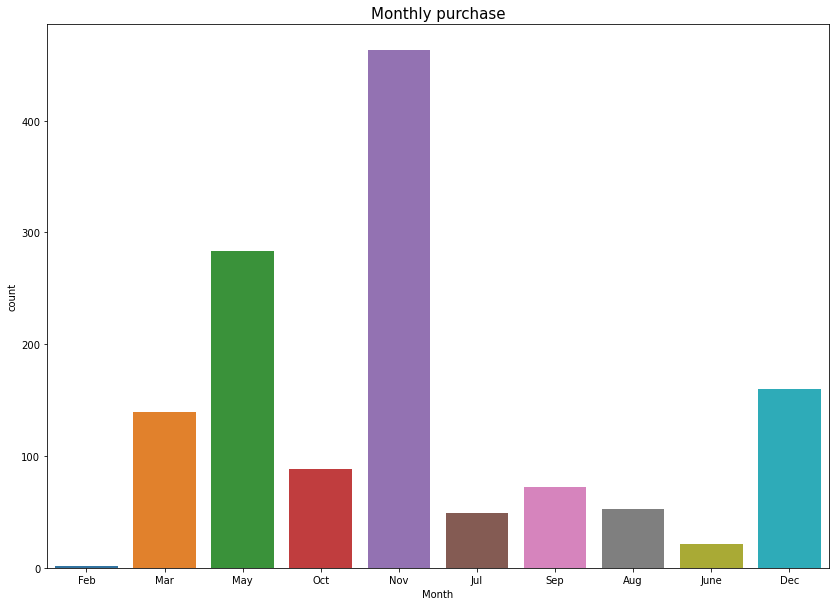

In [10]:
df2=df[df['Revenue']==True]
plt.figure(figsize=(14,10))
sns.countplot(df2['Month'])
plt.title('Monthly purchase', fontsize = 15)
plt.xlabel('Month', fontsize = 10)
plt.ylabel('count', fontsize = 10)

#### It can be noted that most of the transactions occured during November followed by May whereas February and June turns out to give the least transactions.

### Distribution of PageValue and BounceRate with respect to Revenue

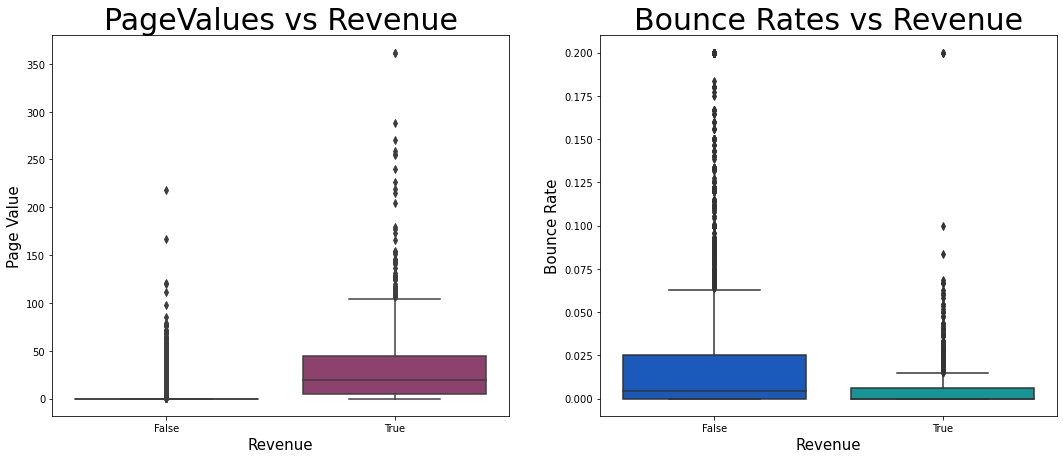

In [11]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.boxplot(x='Revenue',y='PageValues',data=df,palette='flare')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Page Value', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.boxplot(x='Revenue',y='BounceRates',data=df,palette='winter')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Bounce Rate', fontsize = 15)

plt.show()

#### It can be noted that the page value of a buyer is comparatively higher than a non buyer. Bouncerate appears to be higher for non buyers compared to buyers. It might be because buyers are pretty adamant in buying and hence won't bounce back from the transaction page.

### Distribution of product related duration with respect to revenue.

Text(0, 0.5, 'ProductRelated_Duration')

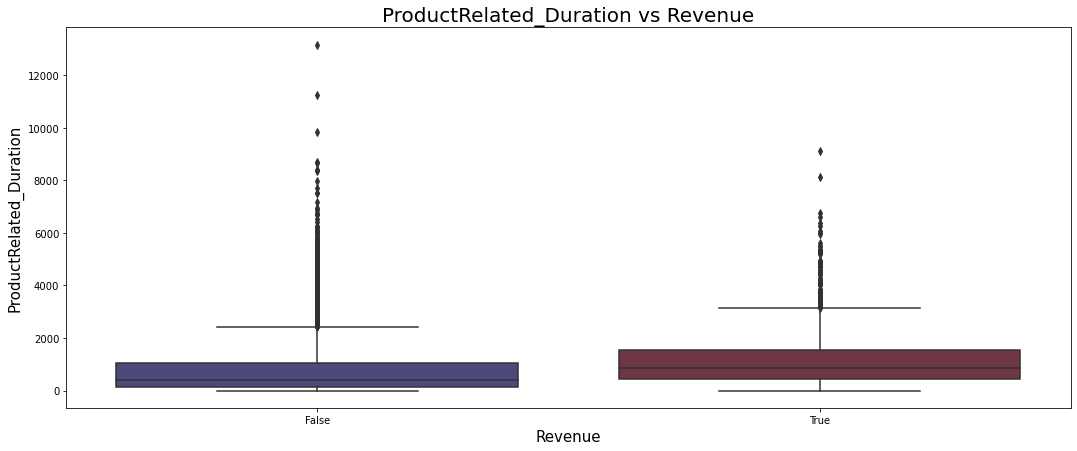

In [12]:
sns.boxplot(x='Revenue',y='ProductRelated_Duration',data=df,palette='icefire')
plt.title('ProductRelated_Duration vs Revenue', fontsize =20 )
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('ProductRelated_Duration', fontsize = 15)

#### As obvious, it can be inferred from the above boxplot that customers who spend more time on the product page are more likely to buy it compared to customers who spend less time.

In [13]:
df['VisitorType'].value_counts()

Returning_Visitor    8536
New_Visitor          1371
Other                  77
Name: VisitorType, dtype: int64

In [14]:
df['OperatingSystems'].value_counts()

2    5386
1    2080
3    2018
4     402
8      72
6      15
5       6
7       5
Name: OperatingSystems, dtype: int64

### Pie chart showing distribution of Visitor Types and different Operating systems.

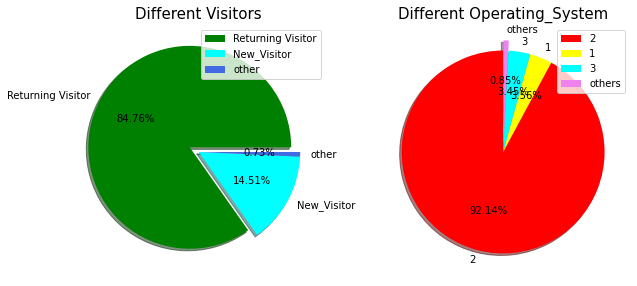

In [15]:

plt.figure(figsize=(10,10))
size = [9669, 1655,83]
colors = ['green', 'cyan','royalblue']
labels = 'Returning Visitor', 'New_Visitor','other'
explode = [0.1,0,0]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 15)
plt.axis('off')
plt.legend()

size = [53866,2080,2018,498]
colors = ['red', 'yellow', 'cyan', 'violet']
labels = '2', '1','3','others'
explode = [0,0,0,0.1]

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels,explode=explode, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Operating_System', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

#### It can be seen that majority of the customers has previously visited that particular product's webpage. 

### Heatmap showing correlation between all features

Text(0.5, 1.0, 'Heatmap of correlation between each variables')

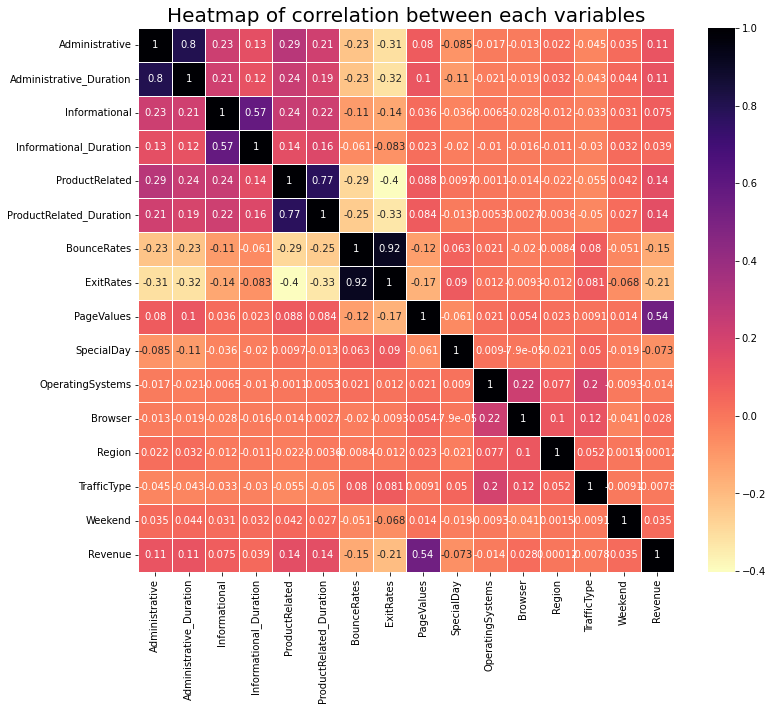

In [16]:
fig,ax=plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),linewidth=0.5,annot=True,cmap='magma_r')
plt.title('Heatmap of correlation between each variables',fontsize=20)

#### From the above heatmap, it can be seen that the target feature 'Revenue' is more correlated with pagevalues and product related duration in a positive way whereas it is negatively correlated with exit rates and bounce rates.

### Encoding categorical features.

In [17]:
le = preprocessing.LabelEncoder()
df['Month'] = le.fit_transform(df.Month.values)
df['VisitorType'] = le.fit_transform(df.VisitorType.values)
df['Weekend'] = le.fit_transform(df.Weekend.values)
df['Revenue'] = le.fit_transform(df.Revenue.values)

In [18]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [19]:
df=df.drop('Region',axis=1)

### Splitting the data into input features and target variable

In [20]:

columns = df.columns.tolist()

columns = [c for c in columns if c not in ['Revenue']]
 
target = 'Revenue'
X = df[columns]
y = df[target]

print(X.shape)
print(y.shape)

(9984, 16)
(9984,)


### Splitting the data into training and test set

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7987, 16)
(7987,)
(1997, 16)
(1997,)


### Oversampling the training data to handle the low proportion of buyers label.

In [22]:
#!pip install imblearn

In [23]:

from imblearn.over_sampling import RandomOverSampler

In [24]:

os =  RandomOverSampler()

In [25]:
X_res, y_res = os.fit_resample(X_train, y_train)

In [26]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 6919, 1: 1068})
Resampled dataset shape Counter({0: 6919, 1: 6919})


### Transforming the data by making it mean centered.

In [27]:
scaler=StandardScaler()

In [28]:
X_res1=scaler.fit_transform(X_res)

In [29]:
X_test=scaler.transform(X_test)

In [30]:
X_test2=pd.DataFrame(X_test, columns = X.columns)

In [31]:
X_res2=pd.DataFrame(X_res1, columns = X_res.columns)

In [32]:

from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 6919, 1: 1068})
Resampled dataset shape Counter({0: 6919, 1: 6919})


# Training Machine Learning Models.

## Logistic Regression

## Function to print results from the cross validation training set


In [33]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))
    
        
    

## Importing the libraries required for Cross Validation 


In [34]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# In this step we are importing the libraries required for logistic regression and to calculate the accuracy score and other metrics
# One way to check all the metrics is using a confsuion matrix. 
# We can calculate the accuracy, precision, recall and f1 score from the confusion matrix

In [35]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# This is a simple step to fit the training data to the logistic regression function of the scikit learn library
# We have left the default values of the hyperparameters.
# To make the model more efficient we will be using 5 fold cross validation.

In [36]:
lr = LogisticRegression(solver = 'liblinear', random_state =100)

lr.fit(X_res,y_res)



LogisticRegression(random_state=100, solver='liblinear')

In [37]:
y_predict_lr = lr.predict(X_test)


C:\Users\14372\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
score_lr = round(accuracy_score(y_predict_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 57.94 %


In [64]:
conf_mx_lr = confusion_matrix(y_test, y_predict_lr)
conf_mx_lr

array([[950, 785],
       [ 55, 207]], dtype=int64)

### Confusion matrix for the training data

In [39]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [40]:
svc = SVC()
svc.fit(X_res,y_res)


SVC()

In [41]:
y_predict_svc = svc.predict(X_test)


C:\Users\14372\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [42]:
score_svc = round(accuracy_score(y_predict_svc,y_test)*100,2)

print("The accuracy score achieved using Support Vector Classifier is: "+str(score_svc)+" %")

The accuracy score achieved using Support Vector Classifier is: 86.88 %


In [45]:
from sklearn.neural_network import MLPClassifier


In [46]:
mlp = MLPClassifier()
mlp.fit(X_res,y_res)


MLPClassifier()

In [47]:
y_predict_mlp = mlp.predict(X_test)


C:\Users\14372\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [48]:
score_mlp = round(accuracy_score(y_predict_mlp,y_test)*100,2)

print("The accuracy score achieved using Multi Lever Perceptron Classifier is: "+str(score_mlp)+" %")

The accuracy score achieved using Multi Lever Perceptron Classifier is: 69.1 %


In [49]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
rf = RandomForestClassifier()
rf.fit(X_res,y_res)

RandomForestClassifier()

In [51]:
y_predict_rf = rf.predict(X_test)

C:\Users\14372\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
score_rf = round(accuracy_score(y_predict_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest Classifier is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest Classifier is: 87.58 %


In [53]:
from sklearn.neighbors import KNeighborsClassifier


In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y_predict_knn = knn.predict(X_test)

C:\Users\14372\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [56]:
score_knn = round(accuracy_score(y_predict_knn,y_test)*100,2)

print("The accuracy score achieved using K Nearest Neighbours Classifier is: "+str(score_knn)+" %")

The accuracy score achieved using K Nearest Neighbours Classifier is: 86.88 %


In [58]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [1, 3, 5, 7, 9]
    
}

cv_knn = GridSearchCV(knn, parameters, cv=5)
cv_knn.fit(X_res,y_res)

print_results(cv_knn)

BEST PARAMS: {'n_neighbors': 1}

0.96 (+/-0.004) for {'n_neighbors': 1}
0.924 (+/-0.005) for {'n_neighbors': 3}
0.889 (+/-0.007) for {'n_neighbors': 5}
0.862 (+/-0.015) for {'n_neighbors': 7}
0.837 (+/-0.015) for {'n_neighbors': 9}


In [59]:
knn_best = cv_knn.best_estimator_

In [60]:
knn_best_predict = knn_best.predict(X_test)
conf_mx_knn = confusion_matrix(y_test, knn_best_predict)
conf_mx_knn

C:\Users\14372\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[1735,    0],
       [ 262,    0]], dtype=int64)

In [61]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv_rf = GridSearchCV(rf, parameters, cv=5)
cv_rf.fit(X_res, y_res)

print_results(cv_rf)

BEST PARAMS: {'max_depth': None, 'n_estimators': 50}

0.819 (+/-0.077) for {'max_depth': 2, 'n_estimators': 5}
0.856 (+/-0.007) for {'max_depth': 2, 'n_estimators': 50}
0.856 (+/-0.007) for {'max_depth': 2, 'n_estimators': 250}
0.861 (+/-0.013) for {'max_depth': 4, 'n_estimators': 5}
0.868 (+/-0.01) for {'max_depth': 4, 'n_estimators': 50}
0.867 (+/-0.009) for {'max_depth': 4, 'n_estimators': 250}
0.903 (+/-0.011) for {'max_depth': 8, 'n_estimators': 5}
0.907 (+/-0.011) for {'max_depth': 8, 'n_estimators': 50}
0.908 (+/-0.006) for {'max_depth': 8, 'n_estimators': 250}
0.963 (+/-0.004) for {'max_depth': 16, 'n_estimators': 5}
0.971 (+/-0.003) for {'max_depth': 16, 'n_estimators': 50}
0.973 (+/-0.003) for {'max_depth': 16, 'n_estimators': 250}
0.97 (+/-0.004) for {'max_depth': 32, 'n_estimators': 5}
0.975 (+/-0.002) for {'max_depth': 32, 'n_estimators': 50}
0.974 (+/-0.003) for {'max_depth': 32, 'n_estimators': 250}
0.967 (+/-0.005) for {'max_depth': None, 'n_estimators': 5}
0.976 (+/-0.

In [62]:
rf_best = cv_rf.best_estimator_
